# Multiregion predictions

Making plots to show the predictions for multi-region samples, both for the testset data and external data

In [1]:
import pandas as pd
import numpy as np

In [2]:
low_purity_cutoff = 0.21 # we highlight the samples with purity lower than this when we plot the multi-region predictions
# 0.21 is the bottom 5% of purities
# low_purity_cutoff = 0.42 # 0.42 is the bottom 10%

plot_rectangle_or_star = 'star' #'rectangle' or 'star', controls how the low purity samples are shown on the plot


### Stats for the test data multiregion samples

In [3]:
all_test_predictions = np.loadtxt('figs_xgboost/all_test_predictions')
diagnoses = pd.read_csv('data/training_testing_diagnoses_maxgap_50_newdata.csv', sep = ',')
diagnoses = diagnoses.iloc[2:, ]
diagnoses.loc[:, 'pooled_labels'] = [4 if d == 5 else d for d in diagnoses['overallpath']] # pool the papilary types
# just like in xgboost_reimplementation, get patient id for EPIC samples
diagnoses.loc[:, 'patient_id'] = list(map(lambda s: s[0], diagnoses['colname'].str.split('.'))) # get before '.' for all samples
diagnoses.loc[:, 'patient_id'] = np.where(diagnoses['colname'].str.contains('TCGA|R'), np.nan, diagnoses['patient_id']) # filter out TCGA and chopra
# get row that says if it is multiregion
multi_patients = diagnoses.query('pooled_labels != 0').groupby('patient_id').count().query('pooled_labels > 1').index # removing normals, count each patient's sample count and get the ones that have more than 1 sample

print('Multiregion patient ids:', list(multi_patients))

diagnoses.loc[:, 'multiregion'] = diagnoses['patient_id'].isin(multi_patients)


print('Number of multiregion samples (including normals)', diagnoses['multiregion'].sum()) # 168 multiregion samples (including normals)
print('Number of multiregion ccRCCs', diagnoses.query('pooled_labels == 1')['multiregion'].sum()) # 97 multiregion ccRCCs
print('Number of multi-region patients', len(multi_patients)) # 25 multiregion patients



Multiregion patient ids: ['X5074', 'X5532', 'X5627', 'X5644', 'X5790', 'X5791', 'X5799', 'X5801', 'X5802', 'X5813', 'X5818', 'X5820', 'X5826', 'X5829', 'X5830', 'X5834', 'X5842', 'X5848', 'X5998', 'X6262', 'X6285', 'X6300', 'X7067', 'X7068', 'X7281']
Number of multiregion samples (including normals) 168
Number of multiregion ccRCCs 97
Number of multi-region patients 25


In [4]:
# how many ccRCC multiregions and how many patients is this?

diagnoses.query('pooled_labels == 1')['multiregion'].sum() # 97 multiregion ccRCCs
len(diagnoses.query('pooled_labels == 1 & multiregion == True')['patient_id'].unique()) # 18 ccRCC multiregion patients

# checking by value_counting
print('Number of multiregion patients for each class:')
diagnoses.query('multiregion == True & pooled_labels != 0').groupby('patient_id').mean().value_counts('pooled_labels')

97

18

Number of multiregion patients for each class:


pooled_labels
1.0    18
2.0     4
3.0     2
4.0     1
dtype: int64

In [5]:
# how good do we do on the multiregion samples?

multi_y_true = diagnoses[diagnoses['multiregion'] == True]

multi_preds = all_test_predictions[diagnoses['multiregion'] == True]
multi_y_true_and_preds = multi_y_true
multi_y_true_and_preds['multi_preds'] = multi_preds

print('Accuracy over multiregion samples', (multi_y_true_and_preds['pooled_labels'] == multi_y_true_and_preds['multi_preds']).mean())

multi_y_true_and_preds['correct'] = multi_y_true_and_preds['pooled_labels'] == multi_y_true_and_preds['multi_preds']
# multi_y_true_and_preds
multi_y_true_and_preds.groupby('patient_id').mean('correct')


Accuracy over multiregion samples 0.9702380952380952


/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,overallpath,pooled_labels,multiregion,multi_preds,correct
patient_id,,,,,
X5074,1.333333,1.333333,1.0,1.333333,1.000000
X5532,0.750000,0.750000,1.0,0.750000,1.000000
X5627,1.333333,1.333333,1.0,0.666667,0.333333
X5644,0.875000,0.875000,1.0,0.875000,1.000000
X5790,0.600000,0.600000,1.0,0.600000,1.000000
X5791,4.444444,3.555556,1.0,3.555556,1.000000
X5799,0.700000,0.700000,1.0,0.700000,1.000000
X5801,0.666667,0.666667,1.0,0.666667,1.000000
X5802,0.750000,0.750000,1.0,0.750000,1.000000


In [6]:
# the incorrect multiregion samples:
multi_y_true_and_preds[multi_y_true_and_preds['correct'] == False]

,colname,overallpath,pooled_labels,patient_id,multiregion,multi_preds,correct
1063,X5834.T3,3.0,3.0,X5834,True,2.0,False
1065,X5627.T3.1.,2.0,2.0,X5627,True,1.0,False
1066,X5627.T3.2.,2.0,2.0,X5627,True,1.0,False
1126,X7281.T1a,1.0,1.0,X7281,True,4.0,False
1202,X7281.T1,1.0,1.0,X7281,True,2.0,False


### Plot multiregion figure for test set multiregion samples

In [8]:
pd.options.display.max_rows=100

In [9]:
# get purity for each sample

multi_y_true_and_preds['colname']

purity_ests = pd.read_csv('data/EPICpurity_KIRC.KIRP.KICH.ONC_using158668cpgsmerged.csv')
purity_ests['sample.id'] = 'X' + purity_ests['sample.id'] # add X in front of sample id
purity_ests['sample.id'] = purity_ests['sample.id'].str.replace('(', '.').str.replace(')', '.')
multi_y_true_and_preds = pd.merge(multi_y_true_and_preds, purity_ests, how='left', left_on='colname', right_on='sample.id')

multi_y_true_and_preds[multi_y_true_and_preds['purity'].isna()].shape
is_na = multi_y_true_and_preds[multi_y_true_and_preds['purity'].isna()]
is_na[is_na['overallpath'] != 0]

939      X5799.N2
940      X5799.N3
941      X5813.N2
942      X5813.N3
943     X5799.T7a
          ...    
1230     X5830.T3
1231     X5829.N1
1232     X5829.T1
1233     X5829.T2
1234     X5829.T3
Name: colname, Length: 168, dtype: object

(47, 10)

,colname,overallpath,pooled_labels,patient_id,multiregion,multi_preds,correct,purity,sample.id,label


In [10]:
multi_y_true_and_preds[0:100]

,colname,overallpath,pooled_labels,patient_id,multiregion,multi_preds,correct,purity,sample.id,label
0,X5799.N2,0.0,0.0,X5799,True,0.0,True,NaN,NaN,NaN
1,X5799.N3,0.0,0.0,X5799,True,0.0,True,NaN,NaN,NaN
2,X5813.N2,0.0,0.0,X5813,True,0.0,True,NaN,NaN,NaN
3,X5813.N3,0.0,0.0,X5813,True,0.0,True,NaN,NaN,NaN
4,X5799.T7a,1.0,1.0,X5799,True,1.0,True,0.869835,X5799.T7a,KIRC
5,X5998.N1a,0.0,0.0,X5998,True,0.0,True,NaN,NaN,NaN
6,X5998.N2a,0.0,0.0,X5998,True,0.0,True,NaN,NaN,NaN
7,X5998.T1a,1.0,1.0,X5998,True,1.0,True,0.852568,X5998.T1a,KIRC
8,X5998.T2a,1.0,1.0,X5998,True,1.0,True,0.860978,X5998.T2a,KIRC
9,X5998.T2a.z,1.0,1.0,X5998,True,1.0,True,0.860026,X5998.T2a.z,KIRC


In [12]:
preds = multi_y_true_and_preds.groupby('patient_id')['multi_preds'].apply(list)
corrects = multi_y_true_and_preds.groupby('patient_id')['correct'].apply(list)
purities = multi_y_true_and_preds.groupby('patient_id')['purity'].apply(list)

In [13]:
preds
corrects
purities

patient_id
X5074                                      [0.0, 2.0, 2.0]
X5532                                 [0.0, 1.0, 1.0, 1.0]
X5627                                      [0.0, 1.0, 1.0]
X5644             [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
X5790                            [0.0, 1.0, 1.0, 0.0, 1.0]
X5791        [4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0]
X5799    [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
X5801                       [0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
X5802                                 [1.0, 0.0, 1.0, 1.0]
X5813    [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...
X5818                                 [0.0, 1.0, 1.0, 1.0]
X5820                                 [0.0, 2.0, 2.0, 2.0]
X5826                                 [0.0, 1.0, 1.0, 1.0]
X5829                                 [0.0, 3.0, 3.0, 3.0]
X5830                                      [0.0, 2.0, 2.0]
X5834                            [0.0, 3.0, 3.0, 2.0, 3.0]
X5842    [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

patient_id
X5074                                   [True, True, True]
X5532                             [True, True, True, True]
X5627                                 [True, False, False]
X5644     [True, True, True, True, True, True, True, True]
X5790                       [True, True, True, True, True]
X5791    [True, True, True, True, True, True, True, Tru...
X5799    [True, True, True, True, True, True, True, Tru...
X5801                 [True, True, True, True, True, True]
X5802                             [True, True, True, True]
X5813    [True, True, True, True, True, True, True, Tru...
X5818                             [True, True, True, True]
X5820                             [True, True, True, True]
X5826                             [True, True, True, True]
X5829                             [True, True, True, True]
X5830                                   [True, True, True]
X5834                      [True, True, True, False, True]
X5842    [True, True, True, True, True, True,

patient_id
X5074         [nan, 0.709969254416915, 0.9056863608767679]
X5532    [nan, 0.889243038436757, 0.8892607868865259, 0...
X5627          [nan, 0.553185373665377, 0.550833151427492]
X5644    [0.877089065182968, 0.868232025157751, 0.83867...
X5790    [nan, 0.8886735238244359, 0.8809319056103959, ...
X5791    [0.9564967284177571, 0.9421223463384419, 0.937...
X5799    [nan, nan, 0.8698347164214429, nan, 0.87591068...
X5801    [nan, 0.8462080004185791, 0.8129180178056049, ...
X5802    [0.852490591824601, nan, 0.8240105472884351, 0...
X5813    [nan, nan, 0.13355247551249902, 0.873779953111...
X5818    [nan, 0.875182927105297, 0.8657794558938001, 0...
X5820    [nan, 0.927965137839468, 0.8606028759388149, 0...
X5826    [nan, 0.887400385290738, 0.931095554389102, 0....
X5829    [nan, 0.942711534019072, 0.946205245601248, 0....
X5830         [nan, 0.899452006988631, 0.9556261071852951]
X5834    [nan, 0.6700246807209671, 0.774614178333182, 0...
X5842    [nan, 0.930103449316895, 0.905623922

In [14]:
# create arrays of the right shape for plotting
def get_array_to_plot(preds, corrects, purities):
    max_len = max(map(len, np.array(preds)))

    preds_padded = []
    corrects_padded = []
    purity_padded = []
    for i in range(len(preds)):
        patient_pred = preds[i]
        patient_correct = corrects[i]
        patient_purity = purities[i]

        # sort in pred order:
        sorted_args = np.argsort(patient_pred)
        patient_pred = list(np.array(patient_pred)[sorted_args])
        patient_correct = list(np.array(patient_correct)[sorted_args])
        patient_purity = list(np.array(patient_purity)[sorted_args])

        to_pad = [np.nan]*(max_len - len(patient_pred)) # make list of NAs

        preds_padded.append(patient_pred + to_pad)
        corrects_padded.append(patient_correct + to_pad)
        purity_padded.append(patient_purity + to_pad)
        
    corrects_padded = np.array(corrects_padded)
    preds_padded = np.array(preds_padded)
    purity_padded = np.array(purity_padded)

    return(preds_padded, corrects_padded, purity_padded)

preds_padded, corrects_padded, purity_padded = get_array_to_plot(preds, corrects, purities)
np.array(preds_padded).shape
np.array(corrects_padded).shape
np.array(purity_padded).shape


(25, 16)

(25, 16)

(25, 16)

In [15]:

def get_preds_padded_string(preds_padded, corrects_padded):

    # turning the correct normals into a different correct class
    corrects_padded[(preds_padded == 0) & (corrects_padded == 1)] = 2
    corrects_padded

    # changing annotations from numbers to characters, and only if wrong
    preds_padded_string = np.array([[str(n) for n in p] for p in preds_padded])

    preds_padded_string[(corrects_padded == 1) | (corrects_padded == 2)] = ''
    preds_padded_string
    preds_padded_string[preds_padded_string == 'nan'] = ''

    preds_padded_string[preds_padded_string == '1.0'] = 'cc'
    preds_padded_string[preds_padded_string == '2.0'] = 'ch'
    preds_padded_string[preds_padded_string == '4.0'] = 'p'
    preds_padded_string
    
    return(preds_padded, corrects_padded, preds_padded_string)

preds_padded, corrects_padded, preds_padded_string = get_preds_padded_string(preds_padded, corrects_padded)



In [16]:
# get pathology for each patient
def get_type(labels):
    labels = np.array(labels)
    t = np.unique(labels[labels != 0]) # remove 0s and get unique value
    return(t[0])
      
ground_truth = list(multi_y_true_and_preds.groupby('patient_id')['pooled_labels'].apply(get_type))


In [17]:
# adding pathology labels

def add_pathologies(preds_padded_string, corrects_padded, ground_truth, purity_padded):
    m = {1:'cc', 2:'ch', 3:'on', 4:'p'}
    pathologies_labels = [m[int(p)] for p in ground_truth]

    corrects_padded.shape
    nans_to_append = np.transpose(np.array([[-1]*corrects_padded.shape[0]])) # need to add nans to corrects and purities to make space for the pathology labels
    nans_to_append.shape
    corrects_padded = np.concatenate([nans_to_append, corrects_padded], axis=1)
    purity_padded = np.concatenate([nans_to_append, purity_padded], axis=1)

    pathologies_labels = np.transpose(np.array([pathologies_labels]))
    preds_padded_string = np.concatenate([pathologies_labels, preds_padded_string], axis=1)
    
    
    return(preds_padded_string, corrects_padded, purity_padded)

preds_padded_string, corrects_padded, purity_padded = add_pathologies(preds_padded_string, corrects_padded, ground_truth, purity_padded)


In [18]:
# sorting by pathology

def sort_by_pathology(preds_padded_string, corrects_padded, purity_padded):
    sorted_inds = np.argsort(preds_padded_string[:,0])
    preds_padded_string = np.array([preds_padded_string[i] for i in sorted_inds])
    corrects_padded = np.array([corrects_padded[i] for i in sorted_inds])
    purity_padded = np.array([purity_padded[i] for i in sorted_inds])
    
    return(preds_padded_string, corrects_padded, purity_padded)

preds_padded_string, corrects_padded, purity_padded = sort_by_pathology(preds_padded_string, corrects_padded, purity_padded)

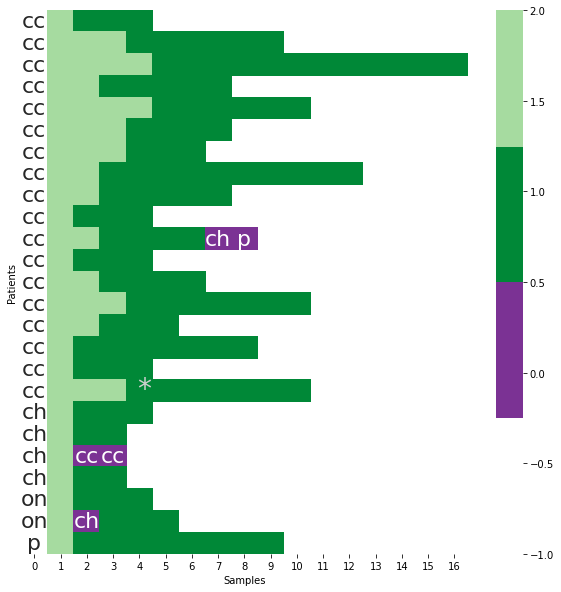

In [23]:
# plotting together on one figure:

def plot_multiregion_predictions(preds_padded_string, corrects_padded, purity_padded, low_purity_cutoff, lw, save_path, colours = ['#FFFFFF', '#7b3294', '#008837', '#a6dba0'], width = 10, height = 10):
    import seaborn as sb
    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle
    plt.figure(figsize=(width, height))
    ax = sb.heatmap(corrects_padded, annot = np.array(preds_padded_string), fmt='s', cmap = colours, annot_kws={"fontsize":22})
    yts = plt.yticks([])
#     yts = plt.xticks([])
    xl = plt.xlabel('Samples')
    yl = plt.ylabel('Patients')
    
    if plot_rectangle_or_star == 'rectangle':
        # now add low purity rectangles
        pad = 0.1
        for r in range(purity_padded.shape[0]):
            for c in range(purity_padded.shape[1]):
                if (purity_padded[r, c] >= 0) & (purity_padded[r, c] <= low_purity_cutoff):
                    ax.add_patch(Rectangle((c+pad, r+pad), 1-pad*2, 1-pad*2, edgecolor = 'black', fill=False, lw=lw))
    elif plot_rectangle_or_star == 'star':
        for r in range(purity_padded.shape[0]):
            for c in range(purity_padded.shape[1]):
                if (purity_padded[r, c] >= 0) & (purity_padded[r, c] <= low_purity_cutoff):
                    if (width == 10) & (height == 10):
                        plt.text(c+0.4, r+0.8, '*', fontsize=28, c='#cfcfcf')
                    else:
                        plt.text(c+0.65, r+0.65, '*', fontsize=38, c='#cfcfcf')


    plt.savefig(save_path)
    
# need to add legend somehow, probably using InkScape
lw=2
plot_multiregion_predictions(preds_padded_string, corrects_padded, purity_padded, low_purity_cutoff, lw, 'figs_xgboost/figs/multiregion_predictions.svg')


In [27]:
# check this fits with the original preds (check no mistake)
ps = diagnoses['patient_id'].isin(multi_patients)
sum(all_test_predictions[ps] != diagnoses['pooled_labels'][ps]) # yes we are expecting 5 incorrects

5

### Now to look at multiregion predictions from Evelonn

In [28]:
# read in the data

import pandas as pd
data = pd.read_csv('data/Evelonn_external/preprocessed_validation_m_vals_from_normalised_data.csv', sep = ',', index_col=0)
diagnoses = pd.read_csv('data/Evelonn_external/preprocessed_validation_beta_diagnoses_from_normalised_data.csv')

mapping = {'Normal': 0, 'ccRCC': 1}
diagnoses['overallpath'] = [mapping[l] for l in diagnoses['diagnosis']]

data = data.iloc[:,2:]
data
data = np.transpose(np.array(data))
data.shape

,GSM3107981,GSM3107982,GSM3107983,GSM3107984,GSM3107985,GSM3107986,GSM3107987,GSM3107988,GSM3107989,GSM3107990,...,GSM3108115,GSM3108116,GSM3108117,GSM3108118,GSM3108119,GSM3108120,GSM3108121,GSM3108122,GSM3108123,GSM3108124
0,0.445777,1.053196,-0.199953,1.923963,0.530827,-0.201547,-0.382081,0.378167,1.323179,1.024741,...,-0.160283,-0.341783,0.907670,0.591315,1.057932,1.387880,1.080279,1.479163,-2.705215,-2.897300
1,4.386087,4.447565,4.724234,4.577407,4.318411,4.369156,4.382151,4.177818,4.154117,4.074982,...,3.205919,2.408423,4.017603,3.938517,3.889494,2.848900,2.820438,2.937798,3.646207,3.717229
2,-3.954403,-3.740219,-3.521352,-3.610765,-3.529647,-3.791212,-3.612350,-3.332187,-3.752620,-3.589886,...,-3.708830,-3.289813,-3.614206,-3.584404,-3.696092,-3.650968,-3.382874,-3.229965,-3.537899,-3.852987
3,-3.196520,-3.396175,-3.436162,-3.128000,-3.035599,-3.983656,-3.652384,-3.252941,-3.434021,-3.249665,...,-3.676860,-3.690315,-3.274611,-3.352450,-3.295036,-2.791133,-2.854212,-3.281811,-3.124426,-3.174152
4,-3.669352,-3.475467,-3.279168,-3.452826,-3.414458,-3.620185,-3.143694,-3.474731,-3.157362,-3.682130,...,-1.290460,-1.389074,-3.108670,-3.156707,-2.965686,-2.980795,-3.017581,-2.928625,-2.342305,-2.847438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,-4.275970,-4.470333,-4.535974,-4.932074,-4.704971,-4.350595,-4.518431,-4.819475,-4.462646,-4.518697,...,-3.312857,-2.430822,-4.298223,-4.146055,-3.605700,-4.301203,-4.156031,-3.746491,-3.170851,-3.446440
158666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.416221,-2.378391,-3.880011,-3.463162,-4.023374,-3.727099,-3.740499,-3.764274,-4.532031,-4.310246
158667,-6.040702,-5.717214,-6.166017,-5.945106,-5.599586,-5.182002,-5.123492,-5.135804,-5.231873,-5.179218,...,-3.553961,-2.890701,-5.192529,-5.050024,-5.122932,-4.526424,-5.455266,-5.086479,-5.251076,-4.920774
158668,-5.345087,-5.709850,-6.441553,-5.783125,-5.566604,-4.398356,-5.339741,-5.414435,-5.312796,-6.256795,...,-3.319758,-2.592112,-5.194665,-4.827036,-5.071763,-5.198925,-5.580490,-4.951520,-4.864956,-4.880152


(144, 158670)

In [29]:
# now make predictions for each model
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from Evaluate import plot_curve, plot_confusion_matrix
# now we can predict with each model
predictions_list = []

def get_model(i):
    import joblib
    model = joblib.load('figs_xgboost/xgboost_models/' + str(i) + '.pkl')
    return(model)

for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(data)
    predictions_list.append(predictions)


/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [30]:
# now get only multiregion samples
multi_regions = diagnoses['name'].str.contains('Pat')
multi_diagnoses = diagnoses.loc[multi_regions]
multi_predictions_list = [predictions[multi_regions] for predictions in predictions_list]

In [31]:
model_num = 3 # for now, do for one model's predictions

multi_diagnoses['patient'] = multi_diagnoses['name'].apply(lambda n: n[37:41])
multi_diagnoses['prediction'] = multi_predictions_list[model_num]
multi_diagnoses['correct'] = multi_diagnoses['prediction'] == multi_diagnoses['overallpath']
multi_diagnoses

/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Unnamed: 0,accession,stage,name,diagnosis,overallpath,patient,prediction,correct
127,128,GSM3108108,TNM I,"genomic DNA from tumor, ccRCC sample Pat1_1",ccRCC,1,Pat1,2,False
128,129,GSM3108109,TNM I,"genomic DNA from tumor, ccRCC sample Pat1_2",ccRCC,1,Pat1,2,False
129,130,GSM3108110,TNM I,"genomic DNA from tumor, ccRCC sample Pat1_3",ccRCC,1,Pat1,2,False
130,131,GSM3108111,TNM I,"genomic DNA from tumor, ccRCC sample Pat2_1",ccRCC,1,Pat2,1,True
131,132,GSM3108112,TNM I,"genomic DNA from tumor, ccRCC sample Pat2_2",ccRCC,1,Pat2,1,True
132,133,GSM3108113,TNM I,"genomic DNA from tumor, ccRCC sample Pat2_3",ccRCC,1,Pat2,1,True
133,134,GSM3108114,TNM I,"genomic DNA from tumor, ccRCC sample Pat3_1",ccRCC,1,Pat3,2,False
134,135,GSM3108115,TNM I,"genomic DNA from tumor, ccRCC sample Pat3_2",ccRCC,1,Pat3,1,True
135,136,GSM3108116,TNM I,"genomic DNA from tumor, ccRCC sample Pat3_3",ccRCC,1,Pat3,1,True
136,137,GSM3108117,TNM I,"genomic DNA from tumor, ccRCC sample Pat4_1",ccRCC,1,Pat4,1,True


In [32]:
# get purity for each sample
purity_ests = pd.read_csv('data/purity_ALLdata_using156probes_210914.csv')
multi_diagnoses = pd.merge(multi_diagnoses, purity_ests, how='left', left_on='accession', right_on='sample.id')


In [33]:
preds = multi_diagnoses.groupby('patient')['prediction'].apply(list)
corrects = multi_diagnoses.groupby('patient')['correct'].apply(list)
purities = multi_diagnoses.groupby('patient')['purity'].apply(list)

preds
corrects
purities

patient
Pat1    [2, 2, 2]
Pat2    [1, 1, 1]
Pat3    [2, 1, 1]
Pat4    [1, 1, 1]
Pat5    [1, 1, 1]
Pat6       [2, 2]
Name: prediction, dtype: object

patient
Pat1    [False, False, False]
Pat2       [True, True, True]
Pat3      [False, True, True]
Pat4       [True, True, True]
Pat5       [True, True, True]
Pat6           [False, False]
Name: correct, dtype: object

patient
Pat1    [0.136587935294087, 0.13193164333293902, 0.134...
Pat2    [0.592635966584331, 0.5854259657522309, 0.6079...
Pat3    [0.150793797021616, 0.15476793673876402, 0.156...
Pat4    [0.595961369997294, 0.513189523875049, 0.56763...
Pat5    [0.5602453676985, 0.5680309702550229, 0.550446...
Pat6               [0.118580052777458, 0.114625954917504]
Name: purity, dtype: object

[1, 1, 1, 1, 1, 1]

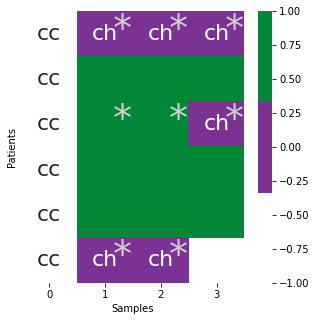

In [34]:
# get padded array to plot
preds_padded, corrects_padded, purity_padded = get_array_to_plot(preds, corrects, purities)

# get preds_paddded_string
preds_padded, corrects_padded, preds_padded_string = get_preds_padded_string(preds_padded, corrects_padded)

ground_truth = list(multi_diagnoses.groupby('patient')['overallpath'].apply(get_type))
ground_truth

# add pathology labels
preds_padded_string, corrects_padded, purity_padded = add_pathologies(preds_padded_string, corrects_padded, ground_truth, purity_padded)

# sort by pathology
preds_padded_string, corrects_padded, purity_padded = sort_by_pathology(preds_padded_string, corrects_padded, purity_padded)

# and plot
lw=3
plot_multiregion_predictions(preds_padded_string, corrects_padded, purity_padded, low_purity_cutoff, lw, 'figs_xgboost_validation/evelonn_multiregion_predictions.svg', colours = ['#FFFFFF', '#7b3294', '#008837'], width = 5, height = 5)



In [35]:
# check this fits with the original preds (check no mistake)
(multi_diagnoses['correct'] == False).sum() # yes we are expecting 6 incorrects


6